In [8]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import decomposition
from sklearn import datasets
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D

# Plot parameter setting 
plt.style.use('default')
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['font.family'] = 'Arial'
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['figure.figsize'] = 8, 6
plt.rcParams['figure.dpi'] = 100

The following example use the iris data set to demonstrate how to perform PCA, plot scree plot, and visualize data. The code is fulling functional, so it should give you a clear view of how to do it.

In [9]:
# Loading the data
iris = datasets.load_iris()
X = iris.data
y = iris.target
X # X is has 4 featurs and 150 samples

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

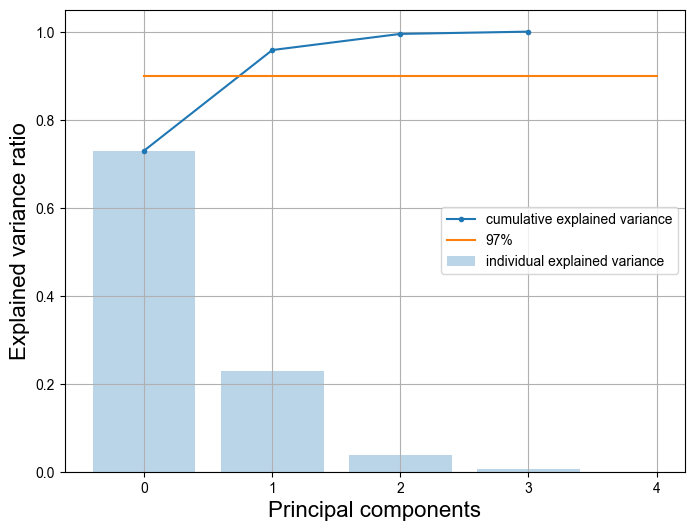

In [10]:
# Standardize the data
from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X)

L = 4 # Plot L PCs in the scree plot
alpha = 0.1 # alpha value, used for explained variance ratio criteria

# Perform PCA
from sklearn import decomposition
pca = decomposition.PCA(n_components = L)
pca.fit(X_std) # Fit in the data
PC = pca.transform(X_std) # Project the data to new plane
var_exp = pca.explained_variance_ratio_ # Get explaind variance ratio
cum_var_exp = np.cumsum(var_exp) # Get the sum of explained variace ratio

# Scree plot
plt.bar(range(L), var_exp, alpha=0.3, align='center', label='individual explained variance')
plt.plot(np.arange(4), cum_var_exp, ".-",label='cumulative explained variance')
plt.plot([0, L], [1-alpha, 1-alpha], label="97%")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.grid()
plt.legend(loc='best')

In [11]:
# %matplotlib notebook
# 3D scatter plot
col = ["blue", "red", "green"] # Use col to automatic select color for different class
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)
for i in range(len(PC)):
    ax.scatter(PC[i, 0], PC[i, 1], PC[i, 2], c=col[y[i]])

ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")

Text(0.5, 0, 'PC3')

<Figure size 800x600 with 0 Axes>

Use the sample code for iris data set as reference and finish the code below to analyze "bearing" data. "bearing.csv" act as X and "wearlevel.csv" act as y.

In [12]:
# P2.1a
bearing = pd.read_csv("./bearing.csv", header=0, index_col=0) # 40 samples raw data
wearlevel = pd.read_csv("./wearlevel.csv", header=None, names=["wear"]) # wear level
bearing # 40 time series signal

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,-0.020254,0.017139,0.008345,-0.011241,-0.009339,0.007285,-0.002433,-0.010448,0.001438,0.003248,...,0.000993,-0.001946,-0.004814,-0.004423,-0.000060,0.002057,0.000457,0.002029,0.003086,-0.004802
1,0.002528,-0.010119,0.012413,0.006156,-0.006088,-0.002961,-0.002784,0.006748,-0.001791,0.000623,...,0.005921,0.007173,-0.002039,-0.009603,0.003332,-0.005871,-0.009141,-0.000523,0.008274,0.007821
2,-0.006250,-0.006294,0.001529,0.003181,-0.001541,-0.003236,0.006672,0.001284,-0.003193,0.002522,...,-0.004668,-0.001323,0.002163,-0.002809,-0.008990,-0.003864,0.001970,-0.005977,0.002475,0.009519
3,0.001738,-0.008802,0.002245,-0.003231,-0.007866,-0.001740,-0.002489,0.017821,0.003395,0.008838,...,0.003202,0.002063,-0.010644,-0.001504,-0.006421,-0.008120,0.000566,0.010656,0.009579,-0.006130
4,-0.012167,0.001288,-0.004178,-0.000452,0.002134,-0.001608,0.002883,-0.004666,0.001192,0.000921,...,-0.012664,-0.003910,0.004167,-0.001025,0.001421,0.003709,0.006821,0.001705,0.003380,0.009798
5,0.003600,-0.002554,-0.001456,0.006077,0.006914,-0.000021,0.001047,-0.000289,0.002795,-0.000734,...,-0.004170,0.001631,0.007298,0.003415,-0.004308,-0.002718,0.000983,-0.001895,-0.001332,0.003647
6,-0.002216,-0.000066,0.000225,0.003939,0.002596,-0.003084,0.000439,-0.001210,-0.003473,0.001064,...,0.004267,-0.004184,0.011249,-0.003142,-0.000575,0.001039,-0.002303,-0.000757,0.002782,0.001222
7,-0.002961,-0.001847,-0.001893,-0.000427,-0.002494,-0.001819,0.015027,0.000137,0.003835,-0.001613,...,-0.004654,-0.005279,0.006607,0.009004,-0.009640,-0.003910,-0.001360,0.001741,0.001815,-0.007068
8,0.002931,-0.008631,-0.004077,-0.004301,-0.000888,0.006783,0.001674,0.006662,0.003352,0.000595,...,-0.004109,-0.000425,0.002649,0.002101,0.004325,-0.010939,0.002154,0.005415,-0.001185,-0.003501
9,0.003041,0.000187,-0.000875,-0.001405,-0.004081,-0.004823,0.004444,0.002270,0.001569,0.000601,...,-0.002673,0.004378,-0.001344,-0.012442,-0.007445,0.004617,-0.009558,-0.004325,0.008172,0.006456


In [13]:
B = np.array(bearing) # transform dataframe bearing to an array

# Create centered data
B_center = np.zeros([len(B), len(B[0])]) # Create a array with same size as B
for i in range(len(B)):
    # Your code here to center the data
    column_mean = np.mean(B[i])  # Calculate mean of each column
    B_center[i] = B[i] - column_mean  # Center the data

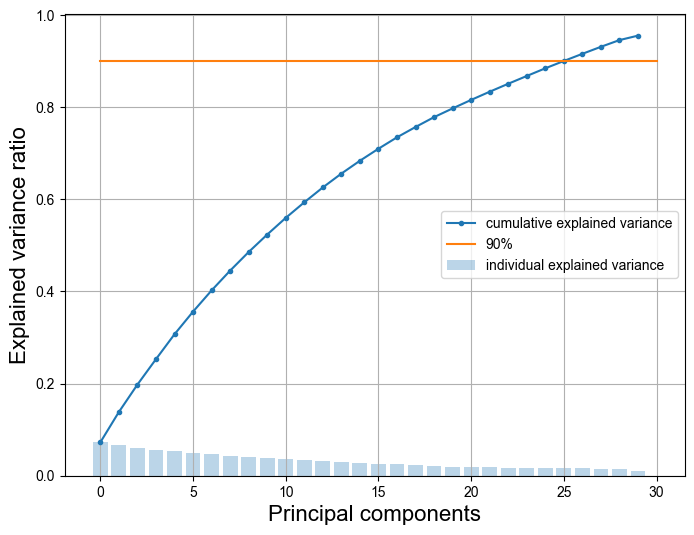

In [14]:
# PCA
from sklearn import decomposition
L = 30 # Plot L PCs in scree plot
pca = decomposition.PCA(n_components=L)

# Your code here to:
#   Fit in the data
#   Project the data to new plane
#   Get explaind variance ratio
#   Get the sum of explained variace ratio

# Fit the data
pca.fit(B_center)

# Project the data to the new plane
PC = pca.transform(B_center)

# Get explained variance ratio
var_exp = pca.explained_variance_ratio_

# Get the cumulative explained variance ratio
cum_var_exp = np.cumsum(var_exp)

# Scree plot
plt.bar(range(L), var_exp, alpha=0.3, align='center', label='individual explained variance')
# plt.step(range(L), cum_var_exp, where='mid', label='cumulative explained variance')
plt.plot(np.arange(L), cum_var_exp, ".-",label='cumulative explained variance')
plt.plot([0, L], [0.9, 0.9], label="90%")
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.grid()
plt.legend(loc='best')
# plt.savefig("Bearing_PCA_center.png")

<Axes3D: xlabel='PC1', ylabel='PC2', zlabel='PC3'>

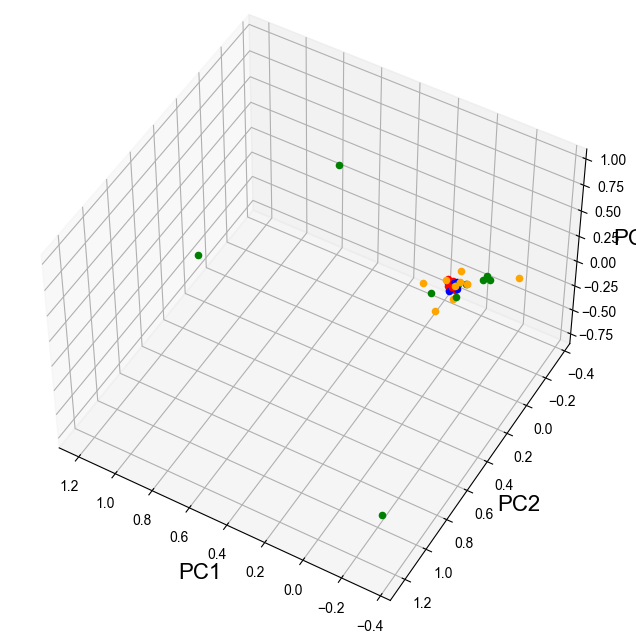

In [22]:
# 3D scatter plot
col = ["blue", "red", "orange", "green"] # You need four color for four level

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=120)
# print(PC)
for i in range(len(PC)):
    # Your code to plot 3D scatter plot
    ax.scatter(PC[i, 0], PC[i, 1], PC[i, 2], c=col[wearlevel["wear"][i]])

# Include legend and all other necessary component
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
fig.add_axes(ax)

In [23]:
# Problem 3.2 FFT
F = np.zeros([len(B), 2])
for i in range(len(F)):
    signal = B_center[i]
    Fs = 1280 # Sampling rate
    N = len(signal)
    T =  N/Fs # Duration
    yf = np.fft.fft(signal)
    yif = np.fft.ifft(yf) # Inverse fft (For demo purpose)
    yf = yf/N # Normalize intensity
    yf = yf[:N//2] # One side is enough since the fft is symmetric
    xf = np.fft.fftfreq(N, 1/Fs)
    xf = xf[:N//2]
    
    # xf is the frequency, abs(yf) is the intensity

    F[i, 0] = xf[np.argmax(abs(yf))]  # Dominant frequency
    F[i, 1] = sum(xf * abs(yf)) / sum(abs(yf))  # Spectral centroid
    
print(F)

[[131.875      300.42413937]
 [128.125      299.5746417 ]
 [162.5        304.79745572]
 [128.125      304.94783413]
 [162.5        303.0746693 ]
 [125.625      279.58108789]
 [128.125      296.88861234]
 [162.5        315.80231776]
 [162.5        306.25348133]
 [162.5        308.10057685]
 [304.375      336.54535141]
 [133.125      338.9953213 ]
 [133.125      340.47779697]
 [287.1875     333.89423528]
 [133.125      334.78628992]
 [309.0625     336.05505521]
 [288.125      337.6220987 ]
 [121.875      338.4917449 ]
 [309.0625     337.24684874]
 [133.125      339.54790965]
 [127.8125     268.38641055]
 [ 99.6875     270.27295205]
 [129.375      269.95411756]
 [126.875      285.29077944]
 [ 98.125      277.24781503]
 [ 99.6875     286.76570277]
 [ 94.6875     291.56998454]
 [ 95.625      290.16577509]
 [ 99.6875     280.99861175]
 [ 99.0625     308.06047405]
 [124.6875     276.22487139]
 [ 95.3125     264.52783187]
 [122.8125     261.14459199]
 [113.4375     266.71604561]
 [100.625     

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


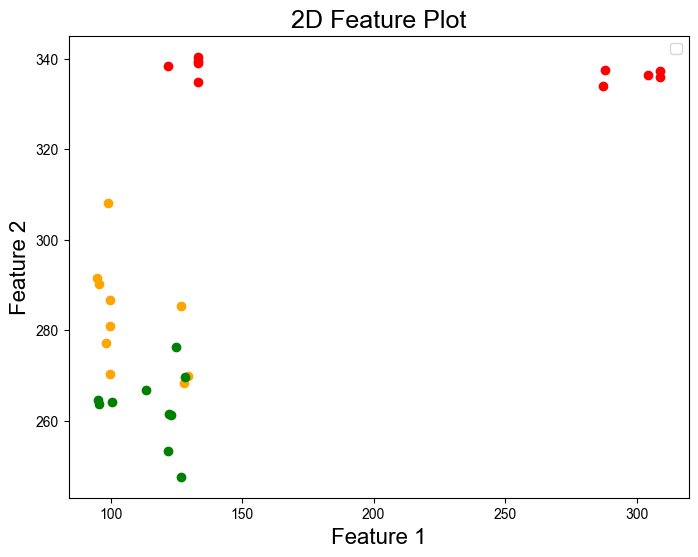

In [27]:
# P3.3 2D feature plot
col = ["blue", "red", "orange", "green"]
for i in range(len(F)):
    # Your code to plot your feature
    if wearlevel["wear"][i] != 0:
        plt.scatter(F[i, 0], F[i, 1], c=col[wearlevel["wear"][i]])

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('2D Feature Plot')
plt.legend()
plt.show()

In [29]:
# P3.4
# Create a feature pool. Include wear level, 3 PCs, 2 frequency-domain feature
Feature = pd.DataFrame(columns=["wear", "P1", "P2", "P3", "F1", "F2"])
Feature["wear"] = wearlevel["wear"]
Feature[["P1", "P2", "P3"]] = PC[:, 0:3]
Feature[["F1", "F2"]] = F

# Two extra "row" to store Fisher ratio
Feature.loc["Fisher 1"] = ""
Feature.loc["Fisher 2"] = ""

# Seperate data to four dataframe for easy access
F0 = Feature[Feature.wear == 0]
F1 = Feature[Feature.wear == 1]
F2 = Feature[Feature.wear == 2]
F3 = Feature[Feature.wear == 3]

# Calculate Fisher ratio for each "feature"
for feature in Feature.columns[1:]:
    m0 = np.mean(F0[feature])
    m1 = np.mean(F1[feature])
    m2 = np.mean(F2[feature])
    m3 = np.mean(F3[feature])
    s0 = np.std(F0[feature])
    s1 = np.std(F1[feature])
    s2 = np.std(F2[feature])
    s3 = np.std(F3[feature])
    Feature.loc["Fisher 1", feature] = (m0 - m3)**2 / (s0**2 + s3**2) # equation for Fisher ratio 1
    Feature.loc["Fisher 2", feature] = (m1 - m2)**2 / (s1**2 + s2**2) # equation for Fisher ratio 2

# Extra "row" for mixed Fisher ratio
Feature.loc["Fisher mix"] = Feature.loc["Fisher 1"] + Feature.loc["Fisher 2"] 

# Take a look at your current dataframe
Feature


,wear,P1,P2,P3,F1,F2
0,0,-0.026389,-0.033466,0.013217,131.875,300.424139
1,0,-0.027856,-0.031835,-0.011036,128.125,299.574642
2,0,-0.011734,-0.032804,-0.010351,162.5,304.797456
3,0,-0.024306,0.013083,-0.003454,128.125,304.947834
4,0,-0.00039,-0.023801,0.00697,162.5,303.074669
5,0,-0.033302,-0.042944,0.021405,125.625,279.581088
6,0,-0.05303,-0.014417,0.001797,128.125,296.888612
7,0,-0.026793,-0.016181,-0.002059,162.5,315.802318
8,0,-0.02685,-0.02289,0.010394,162.5,306.253481
9,0,-0.014259,-0.040463,0.002758,162.5,308.100577


Text(0, 0.5, 'Intensity')

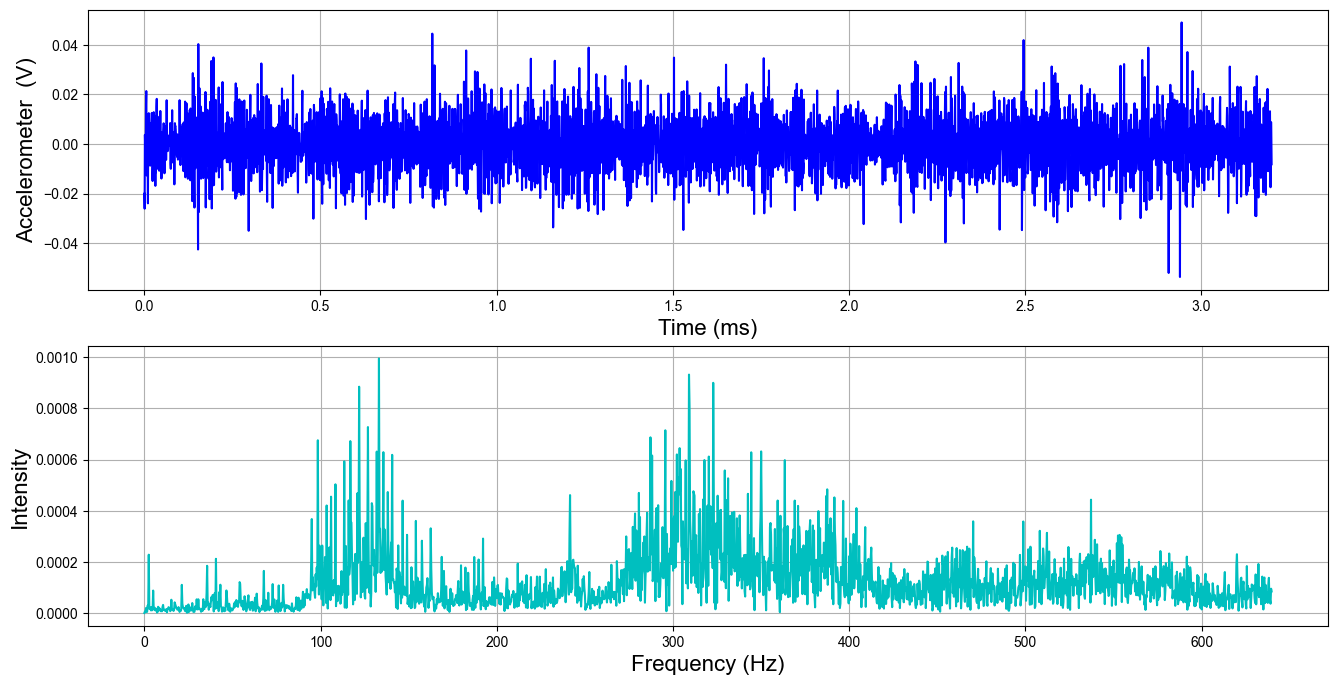

In [30]:
# FFT visualize
signal = B_center[12] # signal is a dataframe
Fs = 1280 # Sampling rate
N = len(signal)
T =  N/Fs # Duration
yf = np.fft.fft(signal)
yif = np.fft.ifft(yf) # Inverse fft (For demo purpose)
yf = yf/N # Normalize intensity
yf = yf[:N//2] # One side is enough since the fft is symmetric

xf = np.fft.fftfreq(N, 1/Fs)
xf = xf[:N//2]

plt.figure(figsize=(16, 8))
plt.subplot(211)
plt.plot(np.linspace(0, T, N), signal, "b")
plt.grid()
plt.xlabel("Time (ms)")
plt.ylabel("Accelerometer  (V)")
plt.subplot(212)
plt.plot(xf, abs(yf), "c-")
plt.grid()
plt.xlabel('Frequency (Hz)')
plt.ylabel('Intensity')

['F2', 'F1', 'P1']


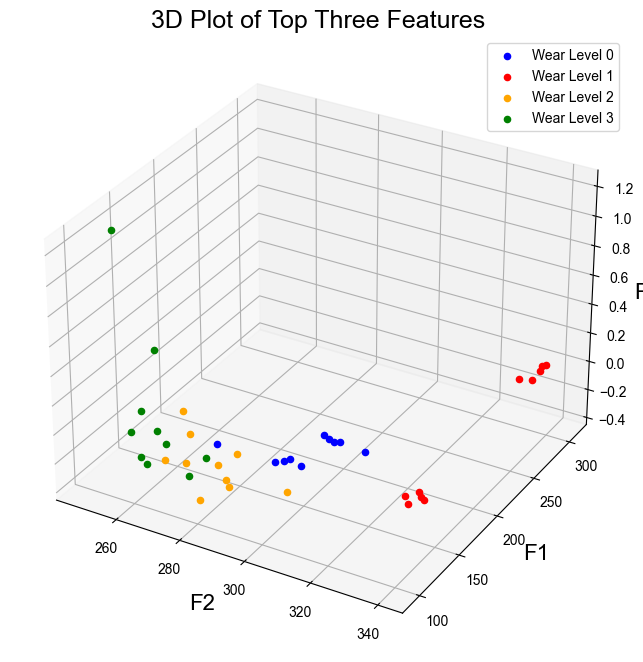

In [38]:
# 2.5
criterion = pd.DataFrame(index=Feature.columns[1:])

for feature in Feature.columns[1:]:
    m0, m1, m2, m3 = F0[feature].mean(), F1[feature].mean(), F2[feature].mean(), F3[feature].mean()
    s0, s1, s2, s3 = F0[feature].std(ddof=1), F1[feature].std(ddof=1), F2[feature].std(ddof=1), F3[feature].std(ddof=1)
    fisher_1 = (m0 - m3)**2 / (s0**2 + s3**2)
    fisher_2 = (m1 - m2)**2 / (s1**2 + s2**2)
    criterion.loc[feature, 'Fisher Score'] = fisher_1 + fisher_2

top_features = criterion.nlargest(3, 'Fisher Score').index.tolist()
print(top_features)

plot_data = Feature[Feature.columns.intersection(['wear']+top_features)]
plot_data = plot_data.drop(plot_data.tail(3).index)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

colors = ['blue', 'red', 'orange', 'green']

for level in sorted(plot_data['wear'].unique()):
    level_data = plot_data[plot_data['wear'] == level]
    ax.scatter(level_data[top_features[0]], level_data[top_features[1]], level_data[top_features[2]],
               c=colors[level], label=f'Wear Level {level}', depthshade=False)

ax.set_xlabel(top_features[0])
ax.set_ylabel(top_features[1])
ax.set_zlabel(top_features[2])
ax.set_title('3D Plot of Top Three Features')
ax.legend()

plt.show()